# ECS308/658: Assignment 3                    Name: Deep Pooja Roll No.:17074

In [97]:
# Importing the dependencies
from sklearn import svm
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import itertools
#loading the dataset
d = pd.read_csv(r'C:\Users\hp\Downloads\HAPT Data Set\15076.csv')
#visualizing the datasets 
print(d.shape)
#separating the datasets into features and labels
X = d.iloc[:,0:10] #taking first 10 features only
X_prime=d.iloc[:,0:25]  # taking all the features
y = d.iloc[:,25]   #labels
#scaling the data
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_prime = scaler.fit_transform(X_prime)
#for binary classification choosing the classes to be [0,1] out of 10 classes 0 to 9
X_1 = X[y<2]
y_1 = y[y<2]
X_prime1 = X_prime[y<2]
#for binary classification choosing the classes to be [8,9] out of 10 classes 0 to 9
X_2 = X[y>7]
y_2 = y[y>7]
X_prime2 = X_prime[y>7]
#print(y_2)
label1 = ['0','1']
label2 = ['8','9']
#splitting the dataset into train_set and test_set
X_train, X_test, y_train, y_test = train_test_split(X_prime2,y_2, test_size=0.2)
d.head()

(3000, 26)


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f17,f18,f19,f20,f21,f22,f23,f24,f25,label
0,1.377697,2.133902,-6.100587,2.978864,-6.100740,0.743613,1.394455,-5.366636,3.309212,3.328204,...,2.035845,0.169431,2.414173,-1.178462,0.185770,-1.681572,-0.042570,-0.148537,2.090809,4
1,-7.696520,-3.139173,4.693645,-0.180141,5.616578,2.974020,-0.014471,-2.416682,-1.262542,-4.765302,...,1.085275,0.905219,-0.352516,-0.197210,-1.806493,-1.166129,-0.116299,-1.234283,0.181447,1
2,3.797538,-5.425128,-1.918365,7.667149,-3.531960,0.282102,-3.135945,1.425891,-0.926668,-2.199202,...,3.685538,2.000232,1.824842,-3.310581,-0.407719,3.053130,0.465926,1.431912,1.253805,6
3,-4.139267,4.356278,-6.324510,-2.087022,2.140759,4.958689,-3.466461,7.368614,4.198713,3.060822,...,1.390797,-2.537387,-2.268042,-4.567086,0.971949,1.942724,3.695771,-2.031839,-2.383351,7
4,-3.090371,5.230297,-2.735201,0.121464,-2.969570,1.181388,1.393529,-7.847282,1.477503,-0.201092,...,0.786808,1.058027,-0.316244,-1.190102,-1.342127,-0.452326,-1.193489,1.051545,2.718591,4


This function below  gives ouput a parametric plot with C as parameter keeping kernel function fixed 

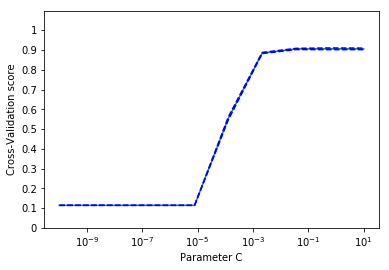

In [198]:
from sklearn.model_selection import cross_val_score
from sklearn import svm

svc = svm.SVC(kernel ='linear')
C_s = np.logspace(-10, 1, 10)

scores = list()
scores_std = list()
for C in C_s:
    svc.C = C
    this_scores = cross_val_score(svc, f, t, n_jobs=1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

# Do the plotting

plt.figure()
plt.semilogx(C_s, scores)
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), 'b--')
plt.semilogx(C_s, np.array(scores) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('Cross-Validation score')
plt.xlabel('Parameter C')
plt.ylim(0, 1.1)
plt.show()

In [70]:
#building linear classifier
linear_classifier = svm.SVC(kernel='linear',C=0.1)
linear_classifier.fit(X_train,y_train)
y_predl =linear_classifier.predict(X_test)
print(linear_classifier.coef_)
print(linear_classifier.intercept_)
acc = linear_classifier.score(X_test,y_test)
print(acc)

[[-0.05  0.46 -0.82  0.59 -0.04 -0.07  0.08  0.42  0.13  0.21  0.08 -0.49
   0.74 -0.15 -0.45 -0.22 -0.25  0.11  0.23  0.16  0.06  0.   -0.02 -0.41
   0.2 ]]
[-0.04]
0.9745762711864406


In [145]:
# building rbf classifier
rbf_clf = svm.SVC(kernel='rbf',degree=3,C=20)
rbf_clf.fit(X_train,y_train)
y_predr =rbf_clf.predict(X_test)
acc = rbf_clf.score(X_test,y_test)
print(acc)

0.9745762711864406


In [27]:
# calculating f1 Score for rbf classifier
f1_score(y_test, y_predr, average='weighted')

0.9830508474576272

In [28]:
# calculating f1 score for linear classifier 
f1_score(y_test, y_predl, average='weighted')

0.9830508474576272

In [64]:
#Compulating classification report
print ("Linear Classifier report: \n",classification_report(y_test, y_predl))
print("RBF Classifier report: \n",classification_report(y_test, y_predr))

Linear Classifier report: 
               precision    recall  f1-score   support

           8       0.98      0.97      0.98        61
           9       0.97      0.98      0.97        57

    accuracy                           0.97       118
   macro avg       0.97      0.97      0.97       118
weighted avg       0.97      0.97      0.97       118

RBF Classifier report: 
               precision    recall  f1-score   support

           8       0.98      0.97      0.98        61
           9       0.97      0.98      0.97        57

    accuracy                           0.97       118
   macro avg       0.97      0.97      0.97       118
weighted avg       0.97      0.97      0.97       118



In [31]:
# function for plotting confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[60  1]
 [ 0 57]]


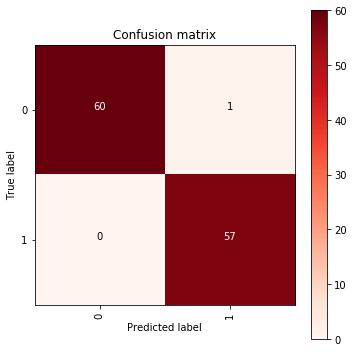

In [71]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predr)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize = (5, 5))
plot_confusion_matrix(cnf_matrix, label1, normalize= False,  title='Confusion matrix')


* conclusion is when class label is 0,1 all kernels linear, poly, rbf giving almost the same accuracy of 99 % but slightly diffrent value of parameter C 0.1 for linear nd 1 for rbf and ploy kernel.
with first 10 features
* when class label 9, 8 are choosen rbf kernel outperforms the linear kernel with accuracy 99 and 95.7 respectively!
* ploynomial kernel with degree has accuracy 97.4
* therefore, with binary classification with class lebel 8,9 rbf performs best of all kernels
with 25 feature
rbf acc = 100%
linear acc= 96.6%
poly with degree 3 acc = 98.3%
* hence including more features accuracy has incresed a bit, 

# Multi-class Classification with 10 features only

In [94]:
#splitting the dataset into train_set and test_set
X_tr, X_te, y_tr, y_te = train_test_split( X,y, test_size=0.25)

classes = ['0','1','2','3','4','5','6','7','8','9']

# RBF model

In [105]:
model1 = svm.SVC(kernel='rbf',C=21,decision_function_shape='ovo')
model1.fit(X_tr,y_tr)
y_pd =model1.predict(X_te)
acc = model1.score(X_te,y_te)
print(acc)

0.8853333333333333


In [106]:
print(classification_report(y_te, y_pd))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93        77
           1       0.91      0.99      0.95        84
           2       0.80      0.89      0.84        63
           3       0.85      0.77      0.81        81
           4       0.86      0.88      0.87        67
           5       0.84      0.84      0.84        67
           6       0.95      0.96      0.95        72
           7       0.90      0.93      0.91        81
           8       0.89      0.82      0.86        79
           9       0.88      0.87      0.88        79

    accuracy                           0.89       750
   macro avg       0.88      0.88      0.88       750
weighted avg       0.89      0.89      0.88       750



Confusion matrix, without normalization
[[70  0  1  1  0  4  1  0  0  0]
 [ 0 83  0  0  1  0  0  0  0  0]
 [ 0  1 56  1  1  0  1  1  2  0]
 [ 1  3  7 62  0  3  0  1  3  1]
 [ 0  3  0  0 59  0  0  0  1  4]
 [ 0  0  1  5  3 56  0  1  0  1]
 [ 1  0  1  0  0  1 69  0  0  0]
 [ 0  0  0  0  2  0  0 75  1  3]
 [ 0  1  4  4  1  2  2  0 65  0]
 [ 1  0  0  0  2  1  0  5  1 69]]


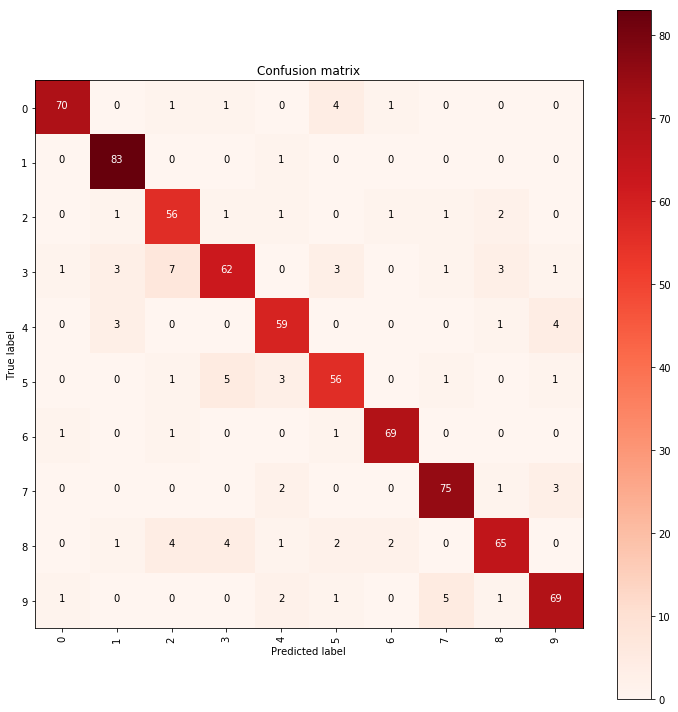

In [107]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_te, y_pd)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize = (10, 10))
plot_confusion_matrix(cnf_matrix, classes, normalize= False,  title='Confusion matrix')

# Linear Model

In [119]:
model2 = svm.SVC(kernel='linear',C=1,decision_function_shape='ovo')
model2.fit(X_tr,y_tr)
y_pd2 =model2.predict(X_te)
acc2 = model2.score(X_te,y_te)
#print(model2.coef_)
#print(model2.intercept_)
print(acc2)

0.8226666666666667


In [120]:
print(classification_report(y_te, y_pd2))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93        77
           1       0.90      0.95      0.92        84
           2       0.74      0.86      0.79        63
           3       0.86      0.73      0.79        81
           4       0.76      0.76      0.76        67
           5       0.66      0.75      0.70        67
           6       0.93      0.88      0.90        72
           7       0.86      0.89      0.87        81
           8       0.86      0.70      0.77        79
           9       0.74      0.78      0.76        79

    accuracy                           0.82       750
   macro avg       0.82      0.82      0.82       750
weighted avg       0.83      0.82      0.82       750



Confusion matrix, without normalization
[[71  0  0  0  0  5  0  0  0  1]
 [ 0 80  0  0  0  1  0  1  1  1]
 [ 0  0 54  2  2  0  3  0  2  0]
 [ 1  1  6 59  1  8  0  2  3  0]
 [ 0  4  0  0 51  1  1  0  0 10]
 [ 0  0  3  6  3 50  0  1  2  2]
 [ 2  0  5  0  0  1 63  0  1  0]
 [ 0  0  0  0  2  0  0 72  0  7]
 [ 1  3  5  2  1 10  1  0 55  1]
 [ 1  1  0  0  7  0  0  8  0 62]]


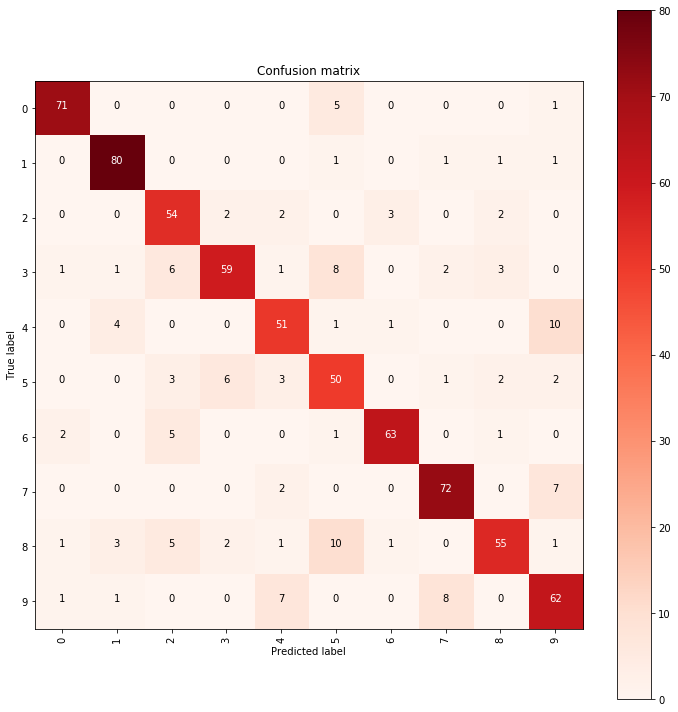

In [121]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_te, y_pd2)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize = (10, 10))
plot_confusion_matrix(cnf_matrix, classes, normalize= False,  title='Confusion matrix')

# Polynomial Model

In [147]:
model3 = svm.SVC(kernel='poly', degree=3,C=10,decision_function_shape='ovo')
model3.fit(X_tr,y_tr)
y_pd3 =model3.predict(X_te)
acc3 = model3.score(X_te,y_te)
print(acc3)

0.8746666666666667


In [148]:
print(classification_report(y_te, y_pd3))

              precision    recall  f1-score   support

           0       0.99      0.87      0.92        77
           1       0.95      0.96      0.96        84
           2       0.83      0.87      0.85        63
           3       0.88      0.85      0.87        81
           4       0.76      0.81      0.78        67
           5       0.82      0.82      0.82        67
           6       0.99      0.96      0.97        72
           7       0.88      0.93      0.90        81
           8       0.83      0.86      0.84        79
           9       0.81      0.80      0.80        79

    accuracy                           0.87       750
   macro avg       0.87      0.87      0.87       750
weighted avg       0.88      0.87      0.88       750



Confusion matrix, without normalization
[[67  0  2  1  0  4  0  0  2  1]
 [ 0 81  1  0  1  0  0  0  0  1]
 [ 0  1 55  2  1  0  1  1  2  0]
 [ 0  1  3 69  0  2  0  2  3  1]
 [ 0  2  0  0 54  0  0  1  2  8]
 [ 0  0  2  4  3 55  0  1  1  1]
 [ 1  0  0  0  0  1 69  0  1  0]
 [ 0  0  0  0  1  0  0 75  2  3]
 [ 0  0  3  2  2  4  0  0 68  0]
 [ 0  0  0  0  9  1  0  5  1 63]]


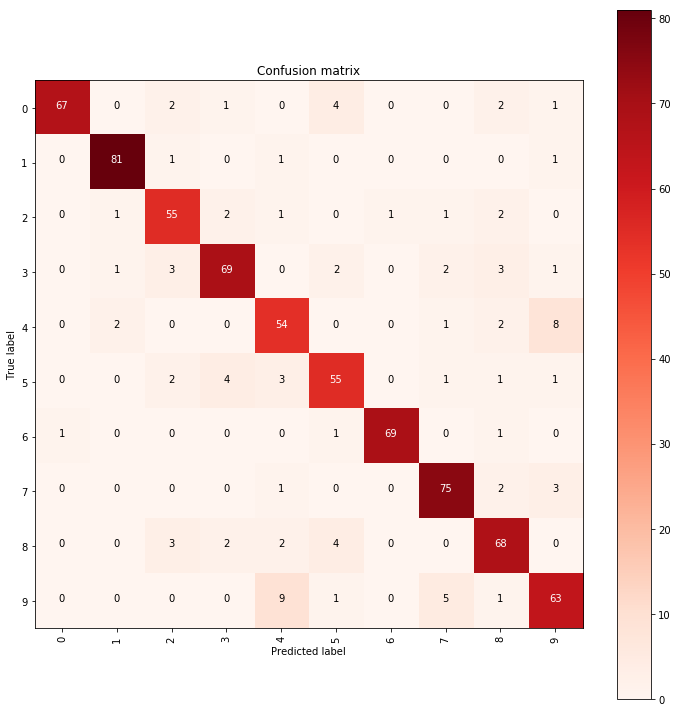

In [149]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_te, y_pd3)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize = (10, 10))
plot_confusion_matrix(cnf_matrix, classes, normalize= False,  title='Confusion matrix')

# # Multi-class Classification with all features

In [156]:
#splitting the dataset into train_set and test_set
X_trn, X_tes, y_trn, y_tes = train_test_split( X_prime,y, test_size=0.25)

In [165]:
model4 = svm.SVC(kernel='linear',C=1,decision_function_shape='ovo')
model4.fit(X_trn,y_trn)
y_pd4 =model4.predict(X_tes)
acc4 = model4.score(X_tes,y_tes)
print(acc4)

0.892


In [166]:
print(classification_report(y_tes, y_pd4))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        84
           1       0.94      1.00      0.97        85
           2       0.86      0.93      0.90        69
           3       0.87      0.74      0.80        84
           4       0.93      0.89      0.91        71
           5       0.79      0.88      0.84        69
           6       0.94      0.89      0.91        66
           7       0.91      0.91      0.91        68
           8       0.84      0.83      0.84        65
           9       0.87      0.89      0.88        89

    accuracy                           0.89       750
   macro avg       0.89      0.89      0.89       750
weighted avg       0.89      0.89      0.89       750



Confusion matrix, without normalization
[[80  0  0  0  0  2  2  0  0  0]
 [ 0 85  0  0  0  0  0  0  0  0]
 [ 2  0 64  1  0  0  1  0  1  0]
 [ 0  1  5 62  0  8  0  2  5  1]
 [ 0  1  0  1 63  0  0  1  1  4]
 [ 0  1  0  4  0 61  1  0  2  0]
 [ 1  1  2  0  0  0 59  2  1  0]
 [ 0  0  1  1  0  0  0 62  0  4]
 [ 1  1  0  2  0  4  0  0 54  3]
 [ 0  0  2  0  5  2  0  1  0 79]]


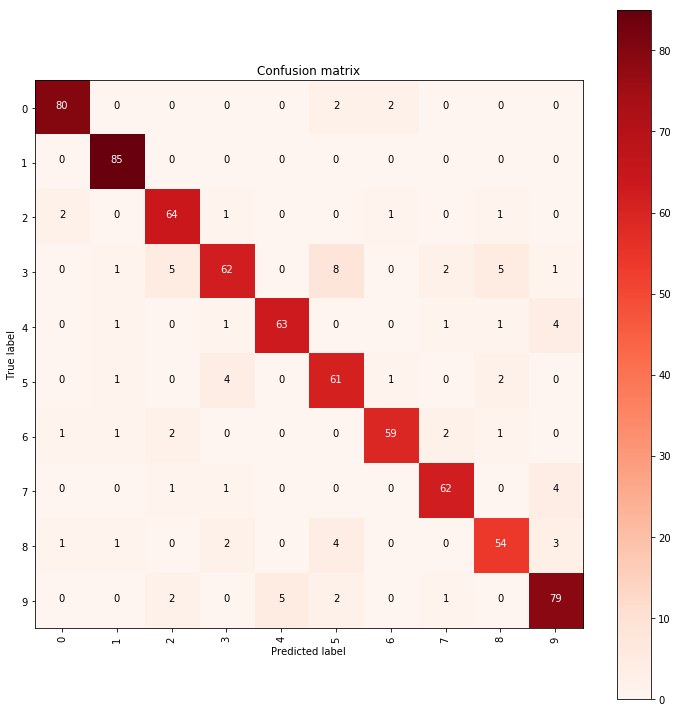

In [167]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_tes, y_pd4)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize = (10, 10))
plot_confusion_matrix(cnf_matrix, classes, normalize= False,  title='Confusion matrix')

In [190]:
model4 = svm.SVC(kernel='poly', degree=3,C=10,decision_function_shape='ovo')
model4.fit(X_trn,y_trn)
y_pd5 =model4.predict(X_tes)
acc5 = model4.score(X_tes,y_tes)
print(acc5)

0.904


In [187]:
print(classification_report(y_tes, y_pd5))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        84
           1       0.99      1.00      0.99        85
           2       0.90      0.88      0.89        69
           3       0.89      0.76      0.82        84
           4       0.90      0.93      0.92        71
           5       0.85      0.88      0.87        69
           6       0.95      0.89      0.92        66
           7       0.95      0.88      0.92        68
           8       0.74      0.92      0.82        65
           9       0.91      0.93      0.92        89

    accuracy                           0.90       750
   macro avg       0.90      0.90      0.90       750
weighted avg       0.91      0.90      0.90       750



Confusion matrix, without normalization
[[79  0  1  1  0  1  1  0  1  0]
 [ 0 85  0  0  0  0  0  0  0  0]
 [ 0  0 61  2  2  0  1  0  3  0]
 [ 0  1  2 64  0  7  0  1  8  1]
 [ 0  0  0  0 66  0  0  0  2  3]
 [ 0  0  0  4  1 61  1  0  2  0]
 [ 1  0  1  0  0  1 59  1  3  0]
 [ 1  0  2  0  0  0  0 60  1  4]
 [ 1  0  0  1  1  2  0  0 60  0]
 [ 0  0  1  0  3  0  0  1  1 83]]


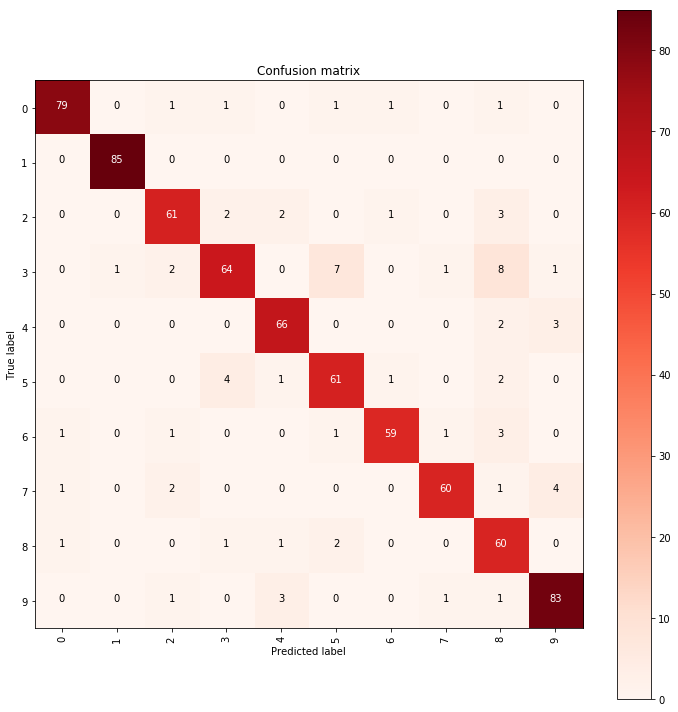

In [188]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_tes, y_pd5)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize = (10, 10))
plot_confusion_matrix(cnf_matrix, classes, normalize= False,  title='Confusion matrix')

# Part 2 kaggle

Reading data from device, since this dataset has no header so also adding appropriate header to it 

In [200]:
df = pd.read_csv(r'C:\Users\hp\Downloads\HAPT Data Set\train_set.csv',names=['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','f21','f22','f23','f24','f25','label'])
yhat = pd.read_csv(r'C:\Users\hp\Downloads\HAPT Data Set\test_set.csv',names=['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','f21','f22','f23','f24','f25'])  
print(df.shape)
print(yhat.shape)
yhat.head()

(10000, 26)
(2000, 25)


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25
0,-23.407833,-751.257086,-442.152199,-227.020992,-154.097040,477.550645,198.381759,479.115409,-357.900322,93.180387,...,-424.982977,46.172032,-60.825776,74.178890,-307.567008,-251.302419,-135.739227,406.823616,-405.460146,198.802193
1,-494.728030,-50.216611,212.863833,160.855858,-581.461605,201.151826,-160.791341,230.570701,-179.613151,120.731694,...,-170.936211,264.332229,-179.644258,-121.761126,16.319810,128.737568,146.093504,91.026759,-237.739206,251.308014
2,898.026435,285.525060,324.443874,800.979263,473.431125,-393.147012,594.203802,181.614763,74.083245,437.551027,...,197.566668,-146.730883,-635.895021,-268.978908,-49.912616,261.906107,71.341834,-205.964371,-32.351094,-87.289742
3,-695.618150,387.114508,87.353753,-234.217614,150.629633,-180.407359,690.895181,-71.627049,-247.262273,-189.345049,...,136.264277,-135.741079,-20.212250,99.379576,-46.323092,-75.837446,-242.465463,138.823356,176.927584,9.888518
4,523.882062,-360.969568,924.304558,286.928819,584.292687,712.977105,119.327713,408.310241,489.701075,-55.029920,...,340.977258,224.571445,20.837340,-70.415372,179.102318,-406.192582,154.682527,-62.449828,-98.353998,97.545001


In [201]:
f = df.iloc[:,0:25] # all feature
t = df.iloc[:,25]  # labels
f_tst = yhat.iloc[:,0:25] # truth values
f = scaler.fit_transform(f) #  normalization
f_tst = scaler.fit_transform(f_tst)
f_train, f_test, t_train, t_test = train_test_split( f,t, test_size=0.25) # spliting into test and train set

In [202]:
model1.fit(f_train,t_train)
y_p =model4.predict(f_test)
accuracy = model4.score(f_test,t_test)
print(accuracy)

0.9872


In [197]:
print(classification_report(t_test, y_p))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       233
           1       0.98      1.00      0.99       287
           2       0.95      0.96      0.95       241
           3       0.92      0.92      0.92       245
           4       0.97      0.95      0.96       243
           5       0.97      0.92      0.95       239
           6       0.97      0.98      0.97       261
           7       0.98      0.93      0.95       259
           8       0.92      0.94      0.93       246
           9       0.92      0.95      0.94       246

    accuracy                           0.95      2500
   macro avg       0.95      0.95      0.95      2500
weighted avg       0.96      0.95      0.95      2500



Confusion matrix, without normalization
[[231   0   0   0   0   0   1   0   1   0]
 [  0 286   1   0   0   0   0   0   0   0]
 [  3   1 232   0   0   0   0   1   4   0]
 [  0   0   2 226   0   6   0   2   5   4]
 [  0   1   1   0 230   0   1   0   1   9]
 [  0   0   0   8   1 221   4   0   4   1]
 [  2   0   0   0   1   0 255   0   3   0]
 [  0   2   6   3   2   0   0 240   2   4]
 [  0   1   2   6   0   1   2   0 232   2]
 [  0   0   1   3   4   0   0   3   1 234]]


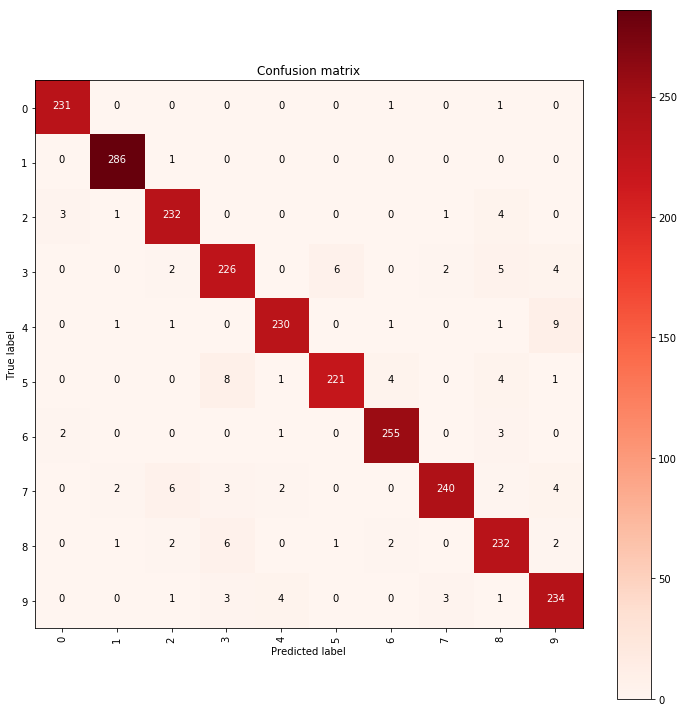

In [195]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(t_test, y_p)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize = (10, 10))
plot_confusion_matrix(cnf_matrix, classes, normalize= False,  title='Confusion matrix')

In [206]:
ypred=model4.predict(f_tst)
dataframe = pd.DataFrame(ypred)
dataframe
dataframe.to_csv (r'C:\Users\hp\Downloads\HAPT Data Set\myfile.csv', index = True, header=True) # saving the predicted values

#print (df)